# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [15]:
A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [21]:
A.shape

(2, 3)

In [22]:
B.shape

(3, 2)

In [23]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [24]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [25]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [26]:
C.shape

(6, 2)

In [27]:
A.shape

(2, 3)

In [28]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [29]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [16]:
df = pd.read_csv('../data/banknotes.csv')

In [17]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [33]:
corr = df.corr()['class'].sort_values()
corr

variace    -0.724843
skewness   -0.444688
entropy    -0.023424
curtosis    0.155883
class       1.000000
Name: class, dtype: float64

In [18]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [19]:
import seaborn as sns

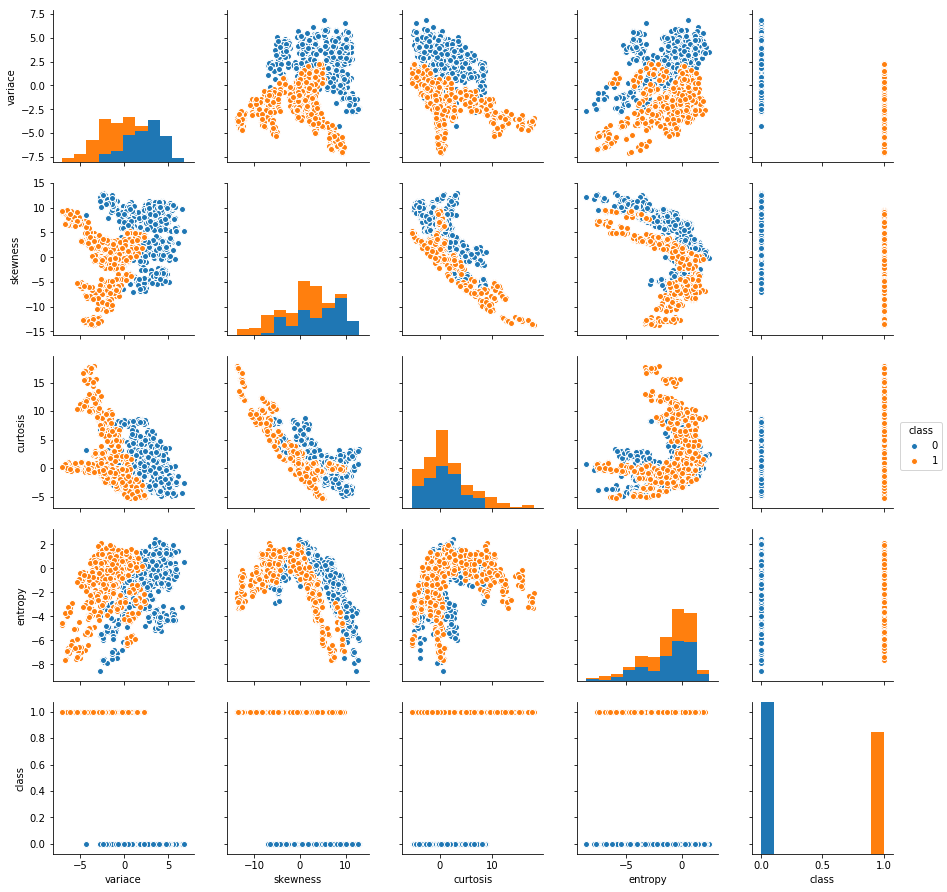

In [20]:
sns.pairplot(df, hue="class")

#### Baseline model

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [35]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [36]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99344978,  0.99124726,  0.99343545])

### Logistic Regression Model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [38]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [39]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 4s 5ms/step - loss: 0.9401 - acc: 0.2667
Epoch 2/10
960/960 [==============================] - 0s 109us/step - loss: 0.8484 - acc: 0.3344
Epoch 3/10
960/960 [==============================] - 0s 108us/step - loss: 0.7740 - acc: 0.4417
Epoch 4/10
960/960 [==============================] - 0s 121us/step - loss: 0.7135 - acc: 0.5260
Epoch 5/10
960/960 [==============================] - 0s 116us/step - loss: 0.6638 - acc: 0.5958
Epoch 6/10
960/960 [==============================] - 0s 115us/step - loss: 0.6224 - acc: 0.6479
Epoch 7/10
960/960 [==============================] - 0s 108us/step - loss: 0.5876 - acc: 0.6865
Epoch 8/10
960/960 [==============================] - 0s 115us/step - loss: 0.5577 - acc: 0.7063
Epoch 9/10
960/960 [==============================] - 0s 114us/step - loss: 0.5319 - acc: 0.7271
Epoch 10/10
412/412 [==============================] - 0s 75us/step


In [40]:
historydf = pd.DataFrame(history.history, index=history.epoch)

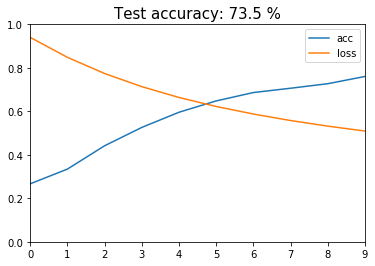

In [41]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [42]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [43]:
historydf = pd.concat(dflist, axis=1)

In [44]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.616667,0.697460,0.956250,0.328570,0.822917,0.405532,0.878125,0.314113
1,0.770833,0.560948,0.958333,0.251568,0.914583,0.266594,0.963542,0.138992
2,0.852083,0.471860,0.958333,0.218432,0.935417,0.216146,0.970833,0.100243
3,0.911458,0.413262,0.960417,0.196698,0.952083,0.184304,0.975000,0.082692
4,0.929167,0.373501,0.960417,0.180512,0.956250,0.161770,0.977083,0.073024
5,0.938542,0.345220,0.963542,0.167731,0.961458,0.145332,0.980208,0.066430
6,0.942708,0.323977,0.964583,0.157260,0.968750,0.132880,0.979167,0.061910
7,0.939583,0.307285,0.966667,0.148430,0.969792,0.122926,0.980208,0.058229
8,0.934375,0.293665,0.968750,0.140873,0.969792,0.114822,0.981250,0.055189
9,0.936458,0.282257,0.968750,0.134398,0.969792,0.108179,0.981250,0.053046


In [45]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [46]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.616667  0.697460  0.956250  0.328570  0.822917  0.405532   
1              0.770833  0.560948  0.958333  0.251568  0.914583  0.266594   
2              0.852083  0.471860  0.958333  0.218432  0.935417  0.216146   
3              0.911458  0.413262  0.960417  0.196698  0.952083  0.184304   
4              0.929167  0.373501  0.960417  0.180512  0.956250  0.161770   
5              0.938542  0.345220  0.963542  0.167731  0.961458  0.145332   
6              0.942708  0.323977  0.964583  0.157260  0.968750  0.132880   
7              0.939583  0.307285  0.966667  0.148430  0.969792  0.122926   
8              0.934375  0.293665  0.968750  0.140873  0.969792  0.114822   
9              0.936458  0.282257  0.968750  0.134398  0.969792  0.108179   

learning_rate      0.50            
metric              acc      loss  
0              0.878125  0.314113  
1              0.963542  0.138992  
2              0.970833  0.100243  
3              0.975000  0.082692  
4              0.977083  0.073024  
5              0.980208  0.066430  
6              0.979167  0.061910  
7              0.980208  0.058229  
8              0.981250  0.055189  
9              0.981250  0.053046

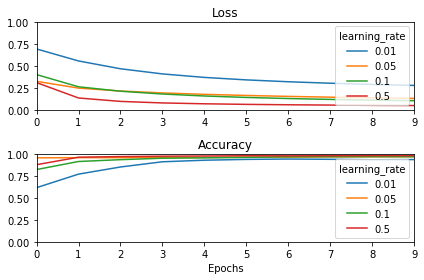

In [47]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [48]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [49]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [50]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.373958  1.121417  0.270833  1.379864  0.460417  1.181520   
1           0.469792  0.846071  0.271875  1.207629  0.465625  1.137215   
2           0.626042  0.662326  0.281250  1.057289  0.473958  1.094354   
3           0.818750  0.550250  0.318750  0.931013  0.480208  1.052920   
4           0.928125  0.481103  0.363542  0.828956  0.485417  1.012958   
5           0.930208  0.435187  0.423958  0.748750  0.493750  0.974436   
6           0.929167  0.402167  0.531250  0.686253  0.496875  0.937506   
7           0.932292  0.376803  0.660417  0.637157  0.507292  0.902085   
8           0.937500  0.356415  0.728125  0.598013  0.518750  0.868240   
9           0.936458  0.339428  0.756250  0.566087  0.520833  0.835876   

batch_size       128            
metric           acc      loss  
0           0.701042  0.555262  
1           0.722917  0.537990  
2           0.743750  0.522150  
3           0.757292  0.507081  
4           0.778125  0.493016  
5           0.798958  0.479871  
6           0.809375  0.467796  
7           0.825000  0.456213  
8           0.836458  0.445684  
9           0.850000  0.435930

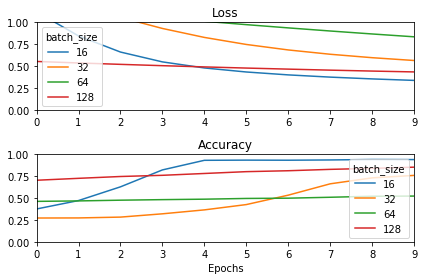

In [51]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [52]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [53]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [54]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

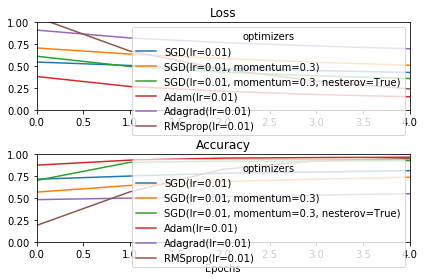

In [55]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [56]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [57]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

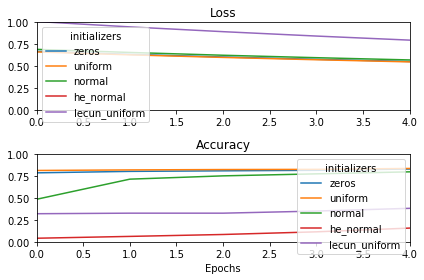

In [58]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [59]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 686us/step - loss: 0.6446 - acc: 0.6190 - val_loss: 0.5939 - val_acc: 0.7361
Epoch 2/20
672/672 [==============================] - 0s 342us/step - loss: 0.4817 - acc: 0.8065 - val_loss: 0.4358 - val_acc: 0.8542
Epoch 3/20
672/672 [==============================] - 0s 318us/step - loss: 0.3415 - acc: 0.9182 - val_loss: 0.2876 - val_acc: 0.9653
Epoch 4/20
672/672 [==============================] - 0s 345us/step - loss: 0.2273 - acc: 0.9807 - val_loss: 0.2018 - val_acc: 0.9896
Epoch 5/20
672/672 [==============================] - 0s 338us/step - loss: 0.1652 - acc: 0.9866 - val_loss: 0.1474 - val_acc: 0.9896
Epoch 6/20
672/672 [==============================] - 0s 304us/step - loss: 0.1255 - acc: 0.9896 - val_loss: 0.1123 - val_acc: 0.9896
Epoch 7/20
672/672 [==============================] - 0s 305us/step - loss: 0.0982 - acc: 0.9896 - val_loss: 0.0877 - val_acc: 0.9861
Epoch 8/20
672/6

In [60]:
result

[0.033530576136505723, 0.98786407766990292]

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.layers

In [63]:
inp = model.layers[0].input
out = model.layers[0].output

In [64]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [65]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [66]:
features_function = K.function([inp], [out])

In [67]:
features_function

In [68]:
features_function([X_test])[0].shape

(412, 2)

In [69]:
features = features_function([X_test])[0]

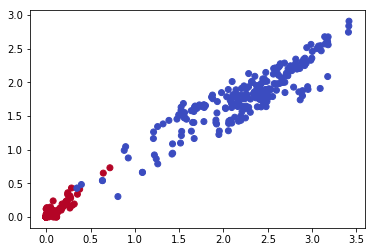

In [70]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [71]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 51us/step


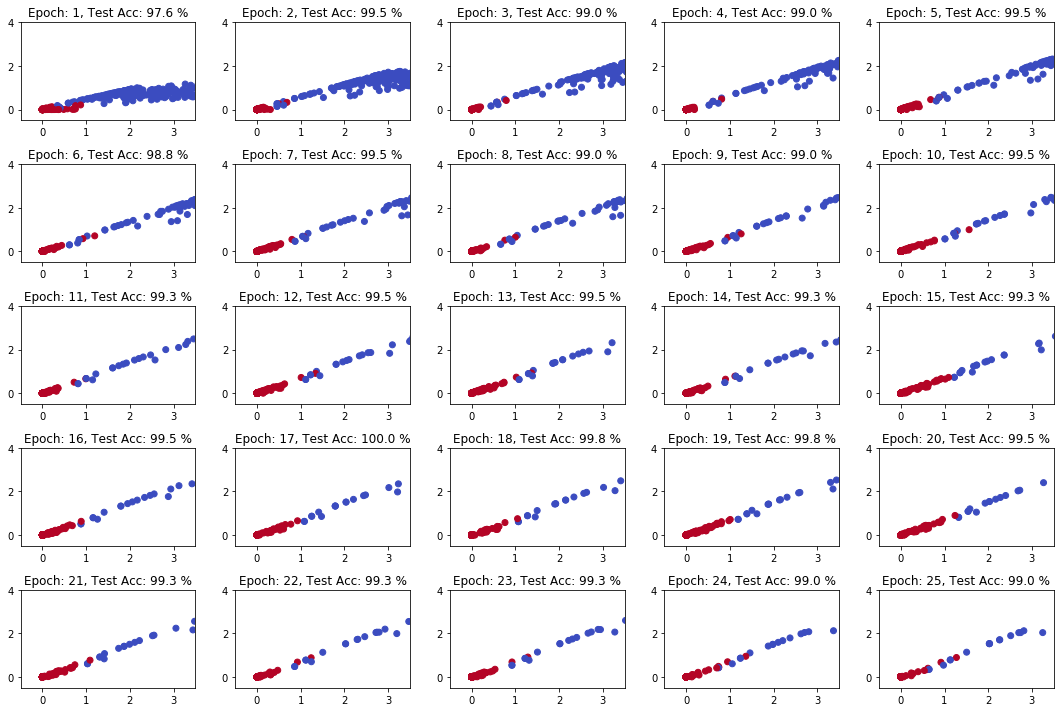

In [72]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard